<a href="https://colab.research.google.com/github/edulapalle/CS584-ML/blob/main/ML%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group-1**

**Title:** Classification of Doremon cartoon characters from a custom Image dataset using a CNN model.

**Team members:**
Santosh Reddy Edulapalle - A20501739
Venkata Siva Rupesh Akurati - A20501754
Jack Harrison Mohr -A20503445

**This is our .ipynb file for the project. We are going to code everything in this file.**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Image dataset:** We are using OpenCV to read the video and capture image with rate of 1 frame per second.

**ImageSS** This function takes in path of the video and uses OpenCV to read each frame and captures the images.

In [2]:
#code to capture images from videos using Opencv.
import os

#importing cv2 from OpenCV
import cv2
from datetime import datetime

def ImageSS(videoPath):

    videoObject = cv2.VideoCapture(videoPath)
    frameNumber = 1

    # checks whether frames were extracted
    boolean = 1
    start = datetime.now()
    try:
        while boolean:
           # cv2.waitKey(10) {doesnt reduce fps}
            boolean, image = videoObject.read()
            cv2.imwrite("frame%d.jpg" %frameNumber, image)
            frameNumber += 1
    #exception handling
    except:
        print("All the frames are read!")
    finally:
        end = datetime.now()
    #calculating execution time.
    executionTime = (end - start).total_seconds() * 10**3
    print(f"The execution time of above program is : {executionTime:.03f}ms")


The below cell is commented to prevent it from accidental running.Uncomment it to use the program to capture video frames.

In [ ]:
#ImageSS("/Users/santosh/Downloads/Doremon_test2.mov")

**Training cascade classifier from scratch:**

Since doremon data set is not availble at the time  of starting this project, we do not find any scascade classifeiers to detect the characteres, so we tried to train our own cascade classifier from scratch.

Below is an attempt to train the classifiers.

**generate_neg_description_txt_file** This function runs over the negative images folder creates a new text tile with all the names in negative image folder + negative tag attached to it.

In [ ]:
#Uncomment this only when needed.
#Creating our own cascade classifier from scratch.
# we are going to train the classifier with our own doremon data.
#generating negative texts for background/( unimportant) data
# def generate_neg_description_txt_file():
#     with open('negative.txt','w') as f:
#         for imageName in os.listdir('negative'):
#             f.write('negative/' + imageName + '\n')
# generate_neg_description_txt_file()

negatives.txt is relatively easy to do. But for positives.txt, we need to manually annotate the frame of the face for each image. To help with it, openCV has annotations functions which is only available on version 3x.

 We re-installed openCV 3.4.16 to use its annotations functions. For the rest of the project, we will be using openCV latest version.
Having had so many troubles with openCV 3.4.16 on my mac, and spending one full day on debugging, I decided to move on to a windows PC and finish the annotation process. I will be transferring the trained model(xml), related files ( annotations.txt) to this mac for further project build.

The code for creating/ generating positive text samples for positive ( target characters) is entirely done on CMD. We used opencv_annotations, opencv_createsamples, opencv_traincascade from opencv 3.4.16 version and stored the required models in respective .xml files. The models we created are: cascadeAll.xml,doremon.xml,nobita.xml,shizuka.xml

Reference - Opencv official documentation.
https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html


Below is an attempt to automatically detect images from video with the help of our trained cascades, its accuracy is not good enough. so we saved it for future development.

In [ ]:

##commented for future development.( out of scope for current project.)


#import numpy as np
#
# # settings
# videopath = '/Users/santosh/Desktop/dorVid/'
# exclusion = {
#     '.DS_Store'
# }
#
# # gets the import location for videos (dataset).
# def get_dataset(videopath=videopath):
#     videos = os.listdir(os.path.dirname(videopath))
#     for item in videos:
#         if item in exclusion:
#             videos.remove(item)
#     return videos
#
# # detect character by using a custom trained haar cascade for each character.
# def detect(character, video, show_video=True):
#     cap = cv2.VideoCapture(videopath + video)
#     Dor_face_cascade = cv2.CascadeClassifier('cascadeAll.xml')
#     results_path = os.path.join('results/' + "Dor_char")
#
#     # make a folder in results for our recognised faces.
#     if not os.path.exists(results_path) and character['save'] == True:
#         os.mkdir(results_path)
#
#     while(1):
#         # grab a frame.
#         ret, frame = cap.read()
#         faces = None
#
#
#         if character['name'] == "Doremon":
#             # detect faces in our image.
#             # try only with frame, no extra parameters.
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                   scaleFactor=1.05,
#                                                   minNeighbors=4,
#                                                   minSize=(24, 24),
#                                                   flags=cv2.CASCADE_SCALE_IMAGE
#                                                   )
#         elif character['name'] == "Nobita":
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                   scaleFactor=1.05,
#                                                   minNeighbors=50,
#                                                   minSize=(24, 24),
#                                                   flags=cv2.CASCADE_SCALE_IMAGE
#                                                   )
#         elif character['name'] == "Shizuka":
#             faces = Dor_face_cascade.detectMultiScale(frame,
#                                                       scaleFactor=1.05,
#                                                       minNeighbors=50,
#                                                       minSize=(24, 24),
#                                                       flags=cv2.CASCADE_SCALE_IMAGE
#                                                       )
#
#         # loop over detected faces.
#         for (x, y, w, h) in faces:
#             # setup region of interest (ROI) for the captured face.
#             roi = frame[y:y+h, x:x+w]
#
#             frame_number = str(int(cap.get(cv2.CAP_PROP_POS_FRAMES)))
#
#             # write detected face to disk.
#             if character['save'] == True:
#                 cv2.imwrite(results_path + '/' + "character" + '_frame_' + frame_number + '.png', roi)
#
#             if show_video is True:
#                 # display detection box for visual purposes.
#                 cv2.rectangle(frame, (x, y), (x+w, y+h), character['detect_color'], 2)
#                 cv2.putText(frame, character['name'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.55, (0, 255, 0), 2)
#             else:
#                 print('detected face @ frame ' + frame_number)
#
#         if show_video is True:
#             # display our image.
#             try:
#                 cv2.imshow('frame', frame)
#             except:
#                 break
#
#             # quit or (next video) on esc.
#             esc = cv2.waitKey(30) & 0xff
#             if esc == 27:
#                 break
#
#     # destroy & release resources.
#     cv2.destroyAllWindows()
#     cap.release()
#
# # process all our videos.
# def process(character):
#     videos = get_dataset()
#     print('number of videos: ' + str(len(videos)))
#
#     for video in enumerate(videos):
#         episode = video[1]
#
#         # dump frames and save to disk each character.
#         print('attempting to detect ' + character['name'] +  ' in \'' + episode + '\'')
#
#         # detect our character.
#         detect(character, video[1], show_video=True)
#
# def main():
#     # step 1: prepare our results folder.
#     if not os.path.exists('results'):
#         os.mkdir('results')
#
#     # step 2: process all our videos to detect Tom & Jerry.
#     characters = [
#         {
#             'name':      "Doremon",
#             'detect_color': (26,225,248),
#             'save':		 True,
#             'cascade':   'doremon.xml'
#         },
#         {
#             'name':      "Nobita",
#             'detect_color': (236,195, 80),
#             'save':		 True,
#             'cascade':   'nobita.xml'
#         },
#         {
#             'name':      "Shizuka",
#             'detect_color': (255,182,193),
#             'save':		 True,
#             'cascade':   'shizuka.xml'
#         }
#     ]
#     # process characters...
#     [process(character) for character in characters]
#     print('done')
#
# if __name__ == '__main__':
#     main()


In [ ]:
##commented for future development.( out of scope for current project.)

#testing doremon.xml for one single image of doremon.
# Reference - official example from opencv website.

# import numpy as np
#
# from matplotlib import pyplot as plt
#
# face_cascade = cv2.CascadeClassifier('doremon.xml')
# #eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
#
# img = cv2.imread('/Users/santosh/Documents/CS584/Images/frame279.jpg')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#
# faces = face_cascade.detectMultiScale(gray, 1.05, 4)
#
#
# for (x,y,w,h) in faces:
#     cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = img[y:y+h, x:x+w]
#     # eyes = eye_cascade.detectMultiScale(roi_gray)
#     # for (ex,ey,ew,eh) in eyes:
#     #     cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#
# cv2.imshow('img',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

We can see that our model was not well-trained enough to capture the characters, it needs much more training. Considering the time challenges we have, we decided to move on with manually cropped and labeled data as of now.

Reference - Tensorflow official documentation.
https://www.tensorflow.org/tutorials/images/classification

Found 2855 files belonging to 12 classes.
Using 2284 files for training.
Found 2855 files belonging to 12 classes.
Using 571 files for validation.
['Doremon_angry', 'Doremon_happy', 'Doremon_sad', 'Doremon_surprised', 'Nobita_angry', 'Nobita_happy', 'Nobita_sad', 'Nobita_surprised', 'Shizuka_angry', 'Shizuka_happy', 'Shizuka_sad', 'Shizuka_suprised']


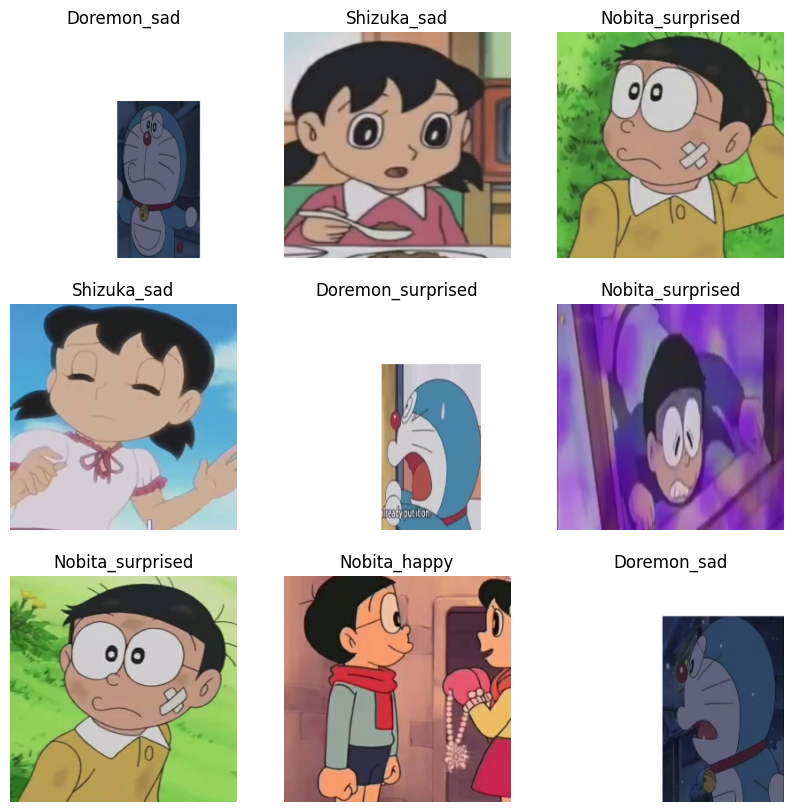

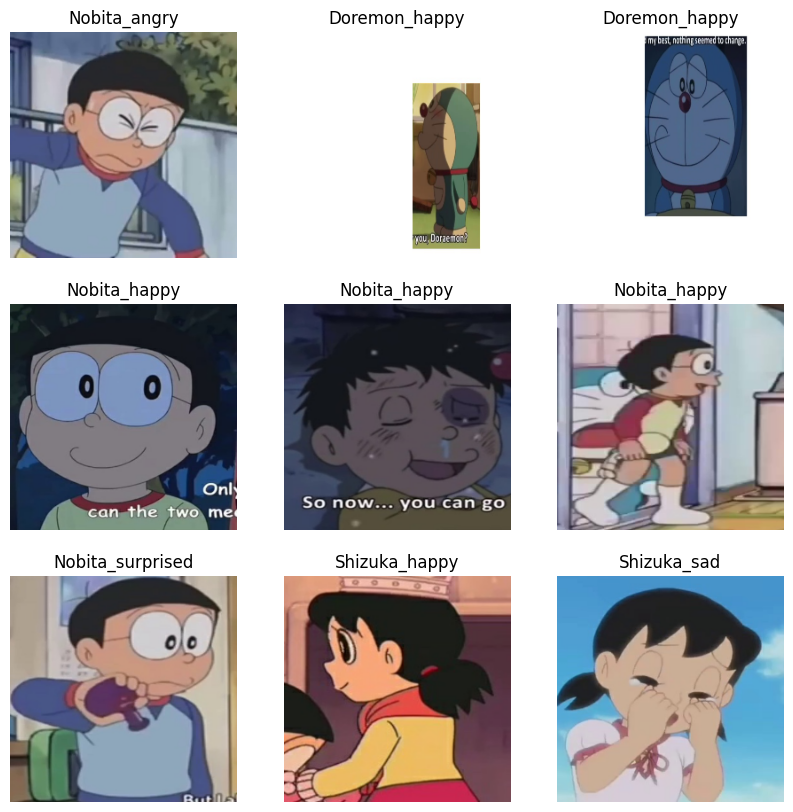

In [ ]:
# #required libraries
# import matplotlib.pyplot as plt
# import numpy as np
# import PIL
# import tensorflow as tf
#
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
#
# #sequnetial models are more time consuming than parallel models, because they perform iteratively.
#
# # path to dataset.
#
#
#
# path = "/Users/santosh/Documents/CS584/dataset/train/"
# img_height = 256
# img_width = 256
#
#
# #training ds
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     path,
#     labels = 'inferred',
#     validation_split = 0.2,
#     subset = "training",
#     seed = 108,
#     batch_size = 32,
#     image_size = (img_height, img_width)
# )
#
# #validation ds
# val_ds = tf.keras.utils.image_dataset_from_directory(
#     path,
#     labels = 'inferred',
#     validation_split = 0.2,
#     subset = "validation",
#     seed = 108,
#     batch_size = 32,
#     image_size = (img_height, img_width)
# )
#
#
# #class names
# class_names = train_ds.class_names
# print(class_names)
#
# #visualising the data
#
#
# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")
#
# plt.figure(figsize=(10, 10))
# for images, labels in val_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

Found 1661 files belonging to 6 classes.
Using 1329 files for training.
Found 1661 files belonging to 6 classes.
Using 332 files for validation.
class names: 
['Doremon_happy', 'Doremon_sad', 'Nobita_happy', 'Nobita_sad', 'Shizuka_happy', 'Shizuka_sad']


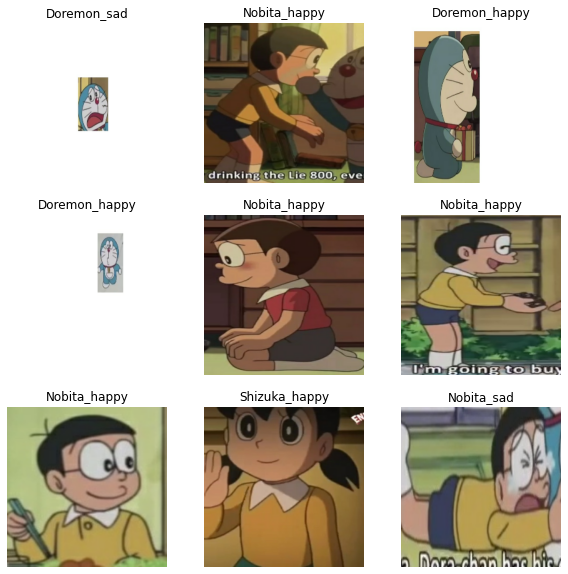

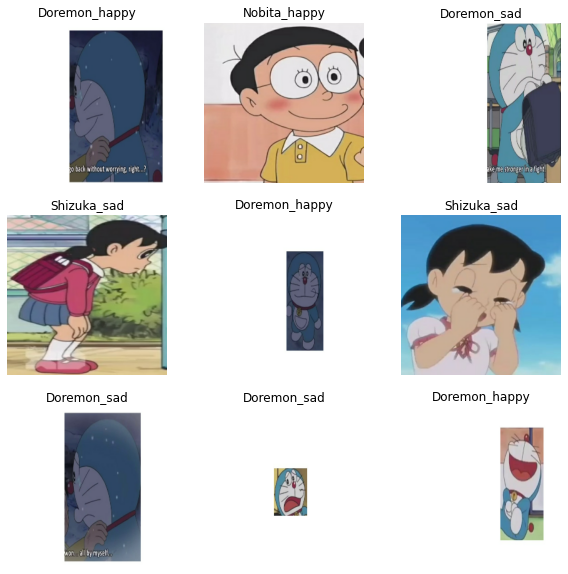

In [3]:
#required libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#sequnetial models are more time consuming than parallel models, because they perform iteratively.

# path to dataset.
#path = "/Users/santosh/Documents/CS584/dataset/train/"

#path to dataset in drive via colab.
path = "/content/drive/MyDrive/train"

#setting image dimensions
img_height = 256
img_width = 256


#Model data set with 6-emotions
# here we took 80-20 data split
#training ds
train_ds_6e = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "training",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)

#validation ds
val_ds_6e = tf.keras.utils.image_dataset_from_directory(
    path,
    labels = 'inferred',
    validation_split = 0.2,
    subset = "validation",
    seed = 108,
    batch_size = 32,
    image_size = (img_height, img_width)
)


#class names
class_names = train_ds_6e.class_names
print("class names: ")
print(class_names)

#visualising the data
plt.figure(figsize=(10, 10))
#training ds
for images, labels in train_ds_6e.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
#validation ds
plt.figure(figsize=(10, 10))
for images, labels in val_ds_6e.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [ ]:
# for image_batch, labels_batch in train_ds:
#     print(image_batch.shape)
#     print(labels_batch.shape)
#     break

(32, 256, 256, 3)
(32,)


As we can see, our image batch consists of 32 image samples with each image being of size 256x256x3. 3-RGB
image_batch is a tensor.


In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE
#
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds_6e = train_ds_6e.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_6e = val_ds_6e.cache().prefetch(buffer_size=AUTOTUNE)

dataset.cache() keeps the images in memory after first epoch.
dataset.prefetch() overlaps data Processing and model execution while training.

RGB consists of values from [0,255] which will be not good for creating a NN.
we will Rescale the values between [0,1].

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

0.14422488 1.0


In [ ]:
normalized_ds_6e = train_ds_6e.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds_6e))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.024753947 0.89393294


Create the model
The Keras Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu').

padding = one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. When padding="same" and strides=1, the output has the same size as the input.

Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers. Working of single neuron. A layer contains multiple number of such neurons.

Output of kernal filter cannot be directly sent to Dense layer, dense needs 1-D array input. so we use Flatten before Dense.
here our final dense layer contains 6 classes {subject ot change depending on model and number of classesf}

In [ ]:
# num_classes = len(class_names)
#
# model = Sequential([
#     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes)
# ])

In [ ]:
num_classes = len(class_names)

model_6e = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compile the model
For this tutorial, choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.

Adam optimizer - https://www.geeksforgeeks.org/intuition-of-adam-optimizer/


In [ ]:
# model.compile(optimizer='adam',
#                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                  metrics=['accuracy'])

# model.summary()

In [ ]:
model_6e.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_6e.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 64, 64, 64)      

Parameters (params) are the weights and biases that will be used for computation in all neurons of the CNN.

Model training

In [ ]:
# epochs=10
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=epochs
# )

In [ ]:
epochs=10
history = model_6e.fit(
    train_ds_6e,
    validation_data=val_ds_6e,
    epochs=epochs
)

Epoch 1/10
42/42 [==============================] - 18s 404ms/step - loss: 1.6913 - accuracy: 0.4251 - val_loss: 0.7592 - val_accuracy: 0.6627
Epoch 2/10
42/42 [==============================] - 17s 399ms/step - loss: 0.5809 - accuracy: 0.7983 - val_loss: 0.6215 - val_accuracy: 0.7470
Epoch 3/10
42/42 [==============================] - 18s 431ms/step - loss: 0.3579 - accuracy: 0.8766 - val_loss: 0.4205 - val_accuracy: 0.8524
Epoch 4/10
42/42 [==============================] - 18s 419ms/step - loss: 0.1775 - accuracy: 0.9338 - val_loss: 0.4442 - val_accuracy: 0.8645
Epoch 5/10
42/42 [==============================] - 17s 417ms/step - loss: 0.1260 - accuracy: 0.9549 - val_loss: 0.4359 - val_accuracy: 0.8524
Epoch 6/10
42/42 [==============================] - 17s 411ms/step - loss: 0.0469 - accuracy: 0.9895 - val_loss: 0.4535 - val_accuracy: 0.8705
Epoch 7/10
42/42 [==============================] - 17s 395ms/step - loss: 0.0206 - accuracy: 0.9970 - val_loss: 0.5689 - val_accuracy: 0.8765

Visualizing the results.

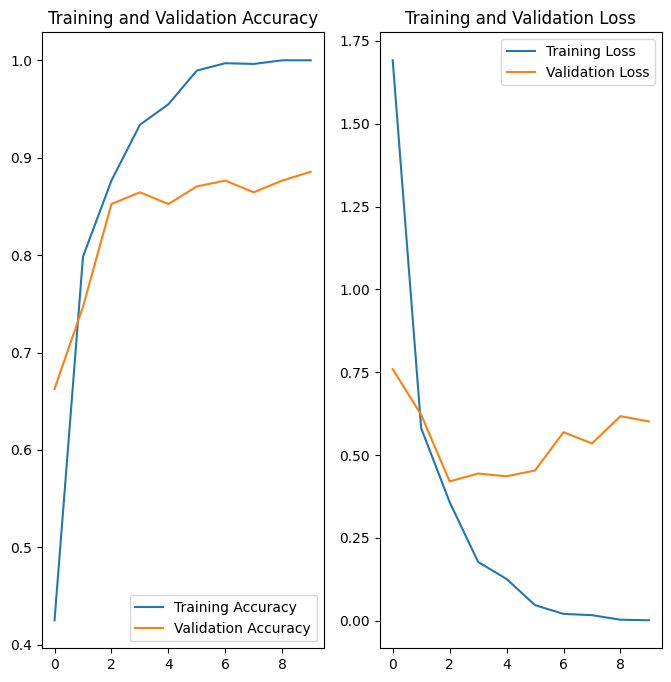

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The graph shows that model has achieved around $\textbf{correct this - }$ 77% accuracy for validation data.

We can see that, the model has good training accuracy but less validation accuracy which is a symbol of Overfitting.

Since we have very less data in certain emotions, our model learned a lot from noises and failed to recognise new data.

We will use data augmentation to generate additinal training samples.




In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal",
                          input_shape=(img_height,
                                       img_width,
                                       3)),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

Visualising new augmented samples.

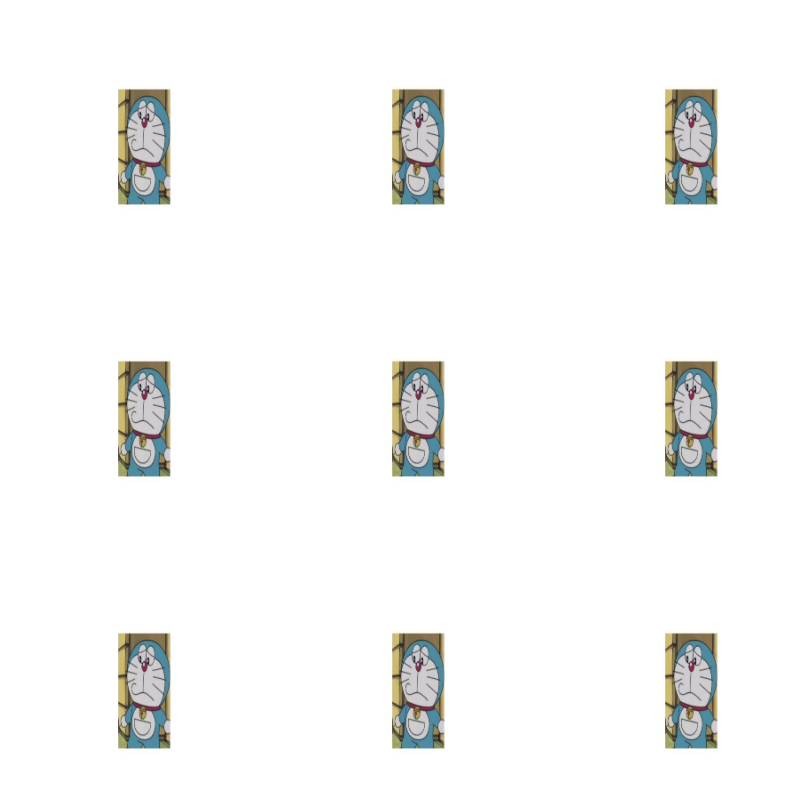

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#     for i in range(9):
#         augmented_images = data_augmentation(images)
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(augmented_images[0].numpy().astype("uint8"))
#         plt.axis("off")

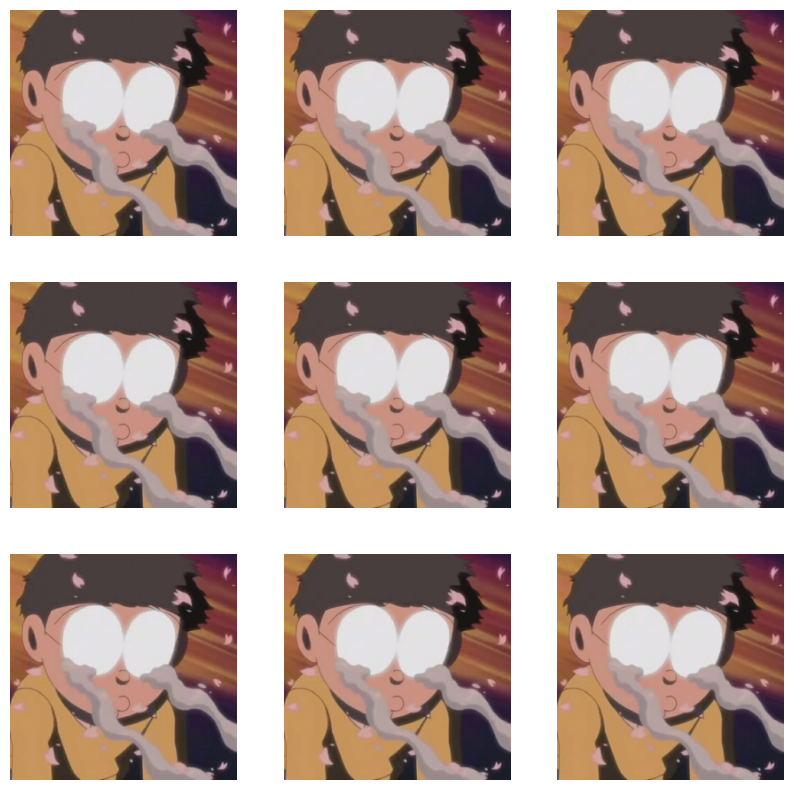

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_6e.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Dropout
Another technique to reduce overfitting is to introduce dropout regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with tf.keras.layers.Dropout before training it using the augmented images:

In [ ]:
# model = Sequential([
#     data_augmentation,
#     layers.Rescaling(1./255),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Dropout(0.2),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes, name="outputs")
# ])

In [ ]:
model_6eA = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

Compile and train the model

In [ ]:
# model.compile(optimizer='adam',
#                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                   metrics=['accuracy'])
#
# model.summary()

In [ ]:
model_6eA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model_6eA.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_13 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                

In [ ]:
# epochs = 15
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=epochs
# )

In [ ]:
epochs = 15
history = model_6eA.fit(
    train_ds_6e,
    validation_data=val_ds_6e,
    epochs=epochs
)

Epoch 1/15
42/42 [==============================] - 21s 460ms/step - loss: 2.2256 - accuracy: 0.2558 - val_loss: 1.3491 - val_accuracy: 0.4428
Epoch 2/15
42/42 [==============================] - 18s 440ms/step - loss: 1.0407 - accuracy: 0.5658 - val_loss: 0.8213 - val_accuracy: 0.6205
Epoch 3/15
42/42 [==============================] - 20s 475ms/step - loss: 0.7779 - accuracy: 0.6456 - val_loss: 0.7502 - val_accuracy: 0.6386
Epoch 4/15
42/42 [==============================] - 18s 437ms/step - loss: 0.6333 - accuracy: 0.7314 - val_loss: 1.0010 - val_accuracy: 0.5813
Epoch 5/15
42/42 [==============================] - 19s 444ms/step - loss: 0.5765 - accuracy: 0.7637 - val_loss: 0.8111 - val_accuracy: 0.6536
Epoch 6/15
42/42 [==============================] - 20s 467ms/step - loss: 0.5325 - accuracy: 0.7961 - val_loss: 0.7919 - val_accuracy: 0.6596
Epoch 7/15
42/42 [==============================] - 19s 442ms/step - loss: 0.4753 - accuracy: 0.7946 - val_loss: 0.9395 - val_accuracy: 0.6355

Visualising

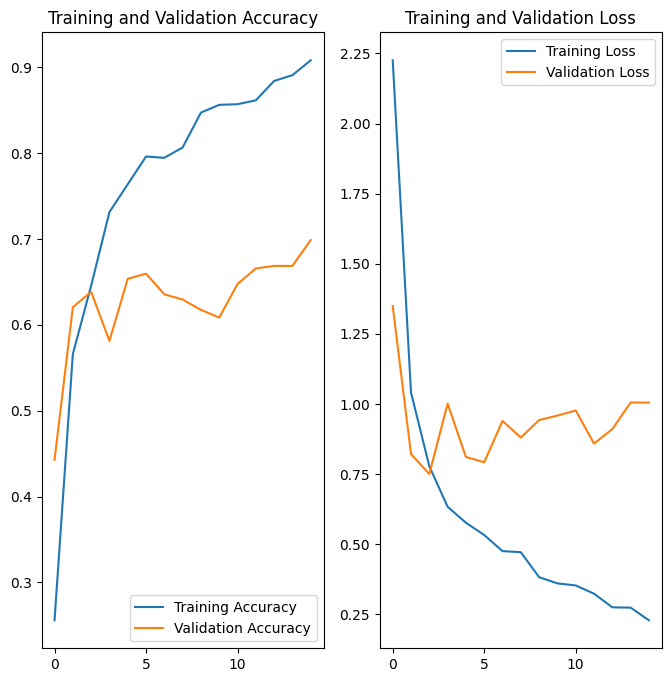

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predicting results

1/1 [==============================] - 0s 46ms/step


IndexError: list index out of range

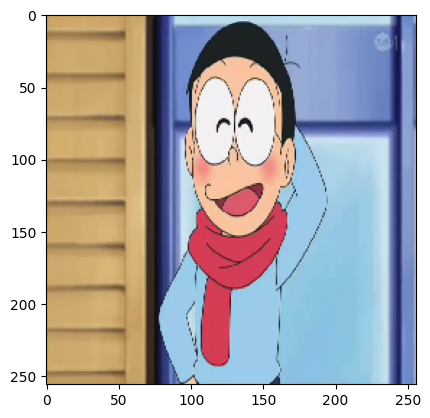

In [ ]:
# test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame12.jpg"
#
# img = tf.keras.utils.load_img(
#     test_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
#
# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])
#
# plt.imshow(img)
#
# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )

1/1 [==============================] - 0s 28ms/step
This image most likely belongs to Nobita_happy with a 100.00 percent confidence.


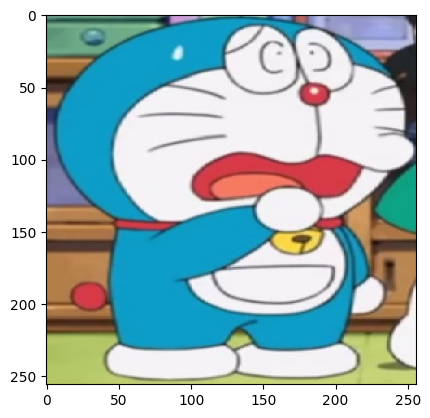

In [ ]:
test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame1.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_6e.predict(img_array)
score = tf.nn.softmax(predictions[0])

plt.imshow(img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 53ms/step
augmented - This image most likely belongs to Nobita_happy with a 100.00 percent confidence.
This image most likely belongs to Nobita_happy with a 100.00 percent confidence.


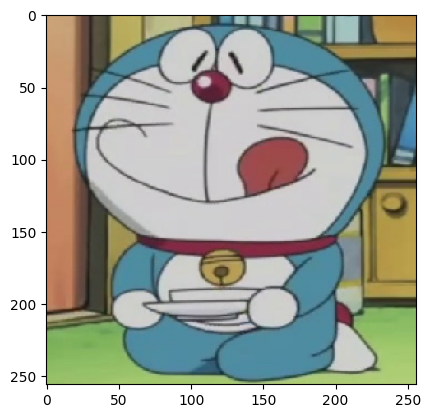

In [ ]:
test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame13.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_6eA.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions1 = model_6e.predict(img_array)
score1 = tf.nn.softmax(predictions1[0])

plt.imshow(img)

print(
    "augmented - This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score1))
)

**Hyper parameter tuning**

We will use keras tuner to tune our model parameters / hyper paramerters

Reference- Official Tensor flow tutorial.

https://www.tensorflow.org/tutorials/keras/keras_tuner



In [ ]:
import keras_tuner as kt


def build_model(hp):
    model = Sequential([
        data_augmentation,
        layers.Rescaling(1./255,input_shape = (img_height,img_width,3)),
        layers.Conv2D(
            filters = hp.Int('conv_1_filter',min_value=16,max_value=256,step=16),
            kernel_size = hp.Choice('conv_1_filter',values=[3,5]),
            activation = 'relu',
            padding = 'same',
            input_shape = (256,256,3)
        ),
        layers.MaxPooling2D(),
        layers.Conv2D(
            filters = hp.Int('conv_2_filter',min_value=16,max_value=256,step=16),
            kernel_size = hp.Choice('conv_2_filter',values=[3,5]),
            activation = 'relu',
            padding = 'same'
        ),
        layers.MaxPooling2D(),
        layers.Conv2D(
            filters = hp.Int('conv_3_filter',min_value=16,max_value=256,step=16),
            kernel_size = hp.Choice('conv_3_filter',values=[3,5]),
            activation = 'relu',
            padding = 'same'
        ),
        layers.MaxPooling2D(),
        layers.Dropout(
            rate = hp.Choice('Dropout_1_rate',values=[0.2,0.5])
        ),
        layers.Flatten(),
        layers.Dense(
            units = hp.Int('dense_1_unit',min_value=16, max_value=256,step=16),
            activation = 'relu'
        ),
        layers.Dense(num_classes,name = "Dense_layer_2_outputs",activation = 'softmax')
    ])
    model.compile(
        optimizer = keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
        loss = tf.keras.losses.SparseCategoricalCrossentropy(), # removing (from_logits=True)
        metrics = ['accuracy']
    )
    return model

In [ ]:
#(32, 256, 256, 3)
# def build_model(hp):
#     model = keras.Sequential([
#         keras.layers.Conv2D(
#             filters=hp.Int('conv_1_filter', min_value=16, max_value=128, step=16),
#             kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
#             activation='relu',
#             input_shape=(256,256,3)
#         ),
#         keras.layers.Conv2D(
#             filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
#             kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
#             activation='relu'
#         ),
#         keras.layers.Flatten(),
#         keras.layers.Dense(
#             units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
#             activation='relu'
#         ),
#         keras.layers.Dense(10, activation='softmax')
#     ])
#
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#
#     return model

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Doremon1")

INFO:tensorflow:Reloading Oracle from existing project output/Doremon1/oracle.json


In [ ]:

tuner_search.search(image_batch,labels_batch,epochs=4,validation_split=0.2)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
112               |?                 |conv_1_filter
224               |?                 |conv_2_filter
80                |?                 |conv_3_filter
0.5               |?                 |Dropout_1_rate
48                |?                 |dense_1_unit
0.01              |?                 |learning_rate

Epoch 1/4


In [ ]:
best_model = tuner_search.get_best_models(num_models=1)[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 112)     8512      
                                                                 
 conv2d_1 (Conv2D)           (None, 248, 248, 48)      134448    
                                                                 
 flatten (Flatten)           (None, 2952192)           0         
                                                                 
 dense (Dense)               (None, 96)                283410528 
                                                                 
 dense_1 (Dense)             (None, 10)                970       
                                                                 
Total params: 283,554,458
Trainable params: 283,554,458
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#TODO
#change the hyper parameters


Feature maps

In [ ]:
layer_names = [layer.name for layer in model_6e.layers]
layer_names

['rescaling_12',
 'conv2d_21',
 'max_pooling2d_21',
 'conv2d_22',
 'max_pooling2d_22',
 'conv2d_23',
 'max_pooling2d_23',
 'flatten_7',
 'dense_11',
 'dense_12']

(1, 256, 256, 3)


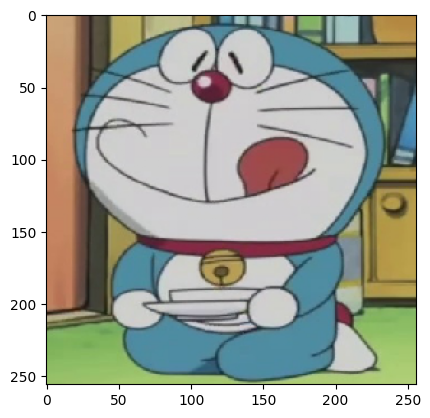

In [ ]:
# image_path= r"path of the image from desktop or internet."
# img = load_img(image_path, target_size=(150, 150))
# input = img_to_array(img)
# input = x.reshape((1,) + x.shape)
# input /= 255.0

test_path = "/Users/santosh/Documents/CS584/dataset/manual_test/frame13.jpg"

img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
img_array = img_array / 255




# Print image tensor shape
print(img_array.shape)

# Print image
import matplotlib.pyplot as plt
plt.imshow(img_array[0])
plt.show()


1/1 [==============================] - 0s 97ms/step
(1, 256, 256, 3)
(1, 256, 256, 16)


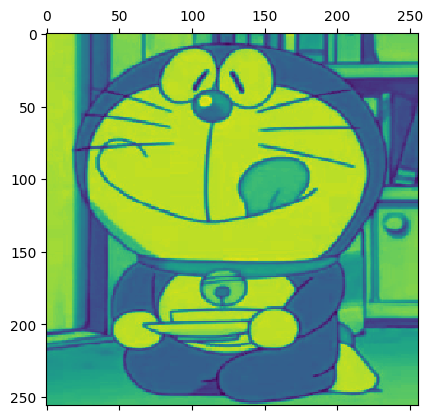

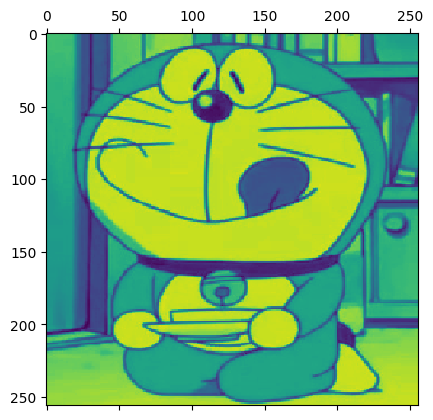

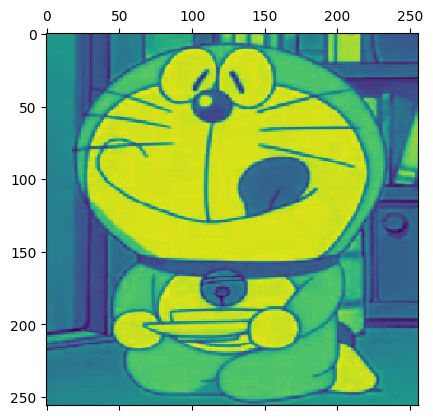

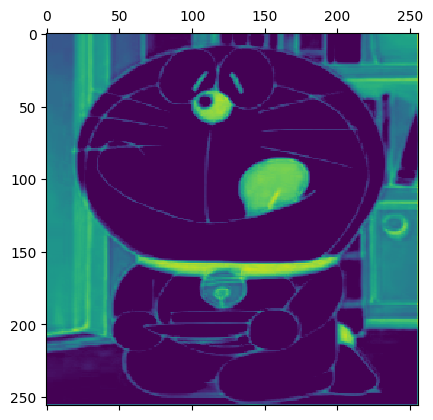

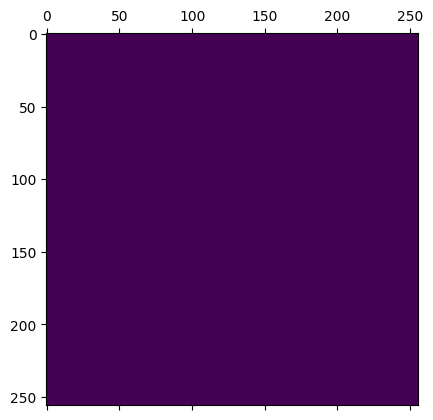

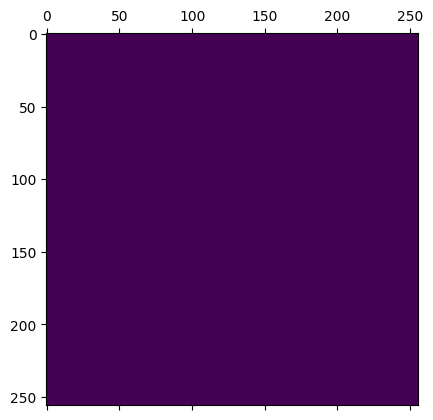

In [ ]:
# # Outputs of the 8 layers, which include conv2D and max pooling layers
# layer_outputs = [layer.output for layer in model_6e.layers[:8]]
# activation_model = tf.keras.models.Model(inputs = model_6e.input, outputs = layer_outputs)
# activations = activation_model.predict(img_array)
#
# # Getting Activations of first layer
# first_layer_activation = activations[0]
#
# # shape of first layer activation
# print(first_layer_activation.shape)
#
# # 6th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 0], cmap ='viridis')
#
# # 15th channel of the image after first layer of convolution is applied
# plt.matshow(first_layer_activation[0, :, :, 1], cmap ='viridis')
#
# plt.matshow(first_layer_activation[0, :, :, 2], cmap ='viridis')
#
# # Getting Activations of first layer
# second_layer_activation = activations[1]
#
# # shape of second layer activation
# print(second_layer_activation.shape)
#
# # 6th channel of the image after second layer of convolution is applied
# plt.matshow(second_layer_activation[0, :, :, 0], cmap ='viridis')
#
# # 15th channel of the image after second layer of convolution is applied
# plt.matshow(second_layer_activation[0, :, :, 1], cmap ='viridis')
#
# plt.matshow(second_layer_activation[0, :, :, 2], cmap ='viridis')


In [ ]:
feature_maps = feature_map_model.predict(img_array)

1/1 [==============================] - 0s 234ms/step


In [ ]:
for layer_name, feature_map in zip(layer_names, feature_maps):
    print(f"The shape of the {layer_name} is =======>> {feature_map.shape}")

The shape of the rescaling_12 is =======>> (1, 256, 256, 3)
The shape of the conv2d_21 is =======>> (1, 256, 256, 16)
The shape of the max_pooling2d_21 is =======>> (1, 128, 128, 16)
The shape of the conv2d_22 is =======>> (1, 128, 128, 32)
The shape of the max_pooling2d_22 is =======>> (1, 64, 64, 32)
The shape of the conv2d_23 is =======>> (1, 64, 64, 64)
The shape of the max_pooling2d_23 is =======>> (1, 32, 32, 64)
The shape of the flatten_7 is =======>> (1, 65536)
The shape of the dense_11 is =======>> (1, 128)
The shape of the dense_12 is =======>> (1, 6)


In [ ]:
# retrieve weights from the second hidden layer
filters, biases = model_6e.layers[1].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

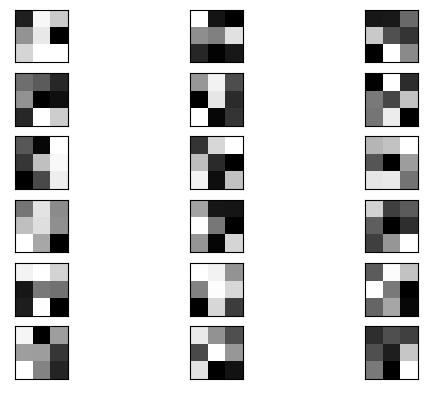

In [ ]:

# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

In [ ]:
layer_outputs = [layer.output for layer in model_6e.layers]
feature_map_model = tf.keras.models.Model(model_6e.input, layer_outputs)
feature_maps = feature_map_model.predict(img_array)
type(feature_maps)

1/1 [==============================] - 0s 108ms/step


list

In [ ]:
feature_maps

[array([[[[0.0031065 , 0.00250673, 0.00184544],
          [0.0031065 , 0.00250673, 0.00184544],
          [0.0031065 , 0.00250673, 0.00184544],
          ...,
          [0.00267589, 0.00199923, 0.00090734],
          [0.00267589, 0.00199923, 0.00090734],
          [0.00267589, 0.00199923, 0.00090734]],
 
         [[0.00313726, 0.00249135, 0.00184544],
          [0.0031065 , 0.00250673, 0.00184544],
          [0.0031065 , 0.00250673, 0.00184544],
          ...,
          [0.00270665, 0.00202999, 0.0009381 ],
          [0.00270665, 0.00202999, 0.0009381 ],
          [0.00270665, 0.00202999, 0.0009381 ]],
 
         [[0.00313726, 0.00249135, 0.00184544],
          [0.00313726, 0.00249135, 0.00184544],
          [0.0031065 , 0.00250673, 0.00184544],
          ...,
          [0.00275279, 0.00207612, 0.00098424],
          [0.00275279, 0.00207612, 0.00098424],
          [0.00275279, 0.00207612, 0.00098424]],
 
         ...,
 
         [[0.00233756, 0.00295271, 0.00159938],
          [0.00233

out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound
out of bound


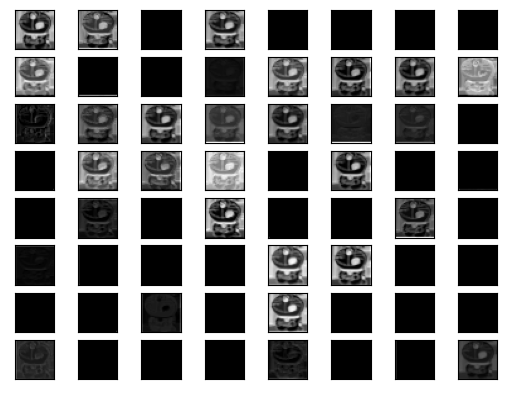

In [ ]:

# plot all 64 maps in an 8x8 squares


square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        try:
            # plot filter channel in grayscale
            plt.imshow(feature_maps[6][0, :, :, ix-1], cmap='gray') # change the number in the array to get different layer images.
        finally:
            print("out of bound")
        ix += 1
plt.show()

# show the figure

# square = 8
# for fmap in feature_maps:
#     # plot all 64 maps in an 8x8 squares
#     ix = 1
#     for _ in range(square):
#         for _ in range(square):
#             # specify subplot and turn of axis
#             ax = plt.subplot(square, square, ix)
#             ax.set_xticks([])
#             ax.set_yticks([])
#             # plot filter channel in grayscale
#             try:
#                 plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
#                 ix += 1
#             finally:
#                 pass
#     # show the figure
#     plt.show()

In [ ]:
#testing git again2